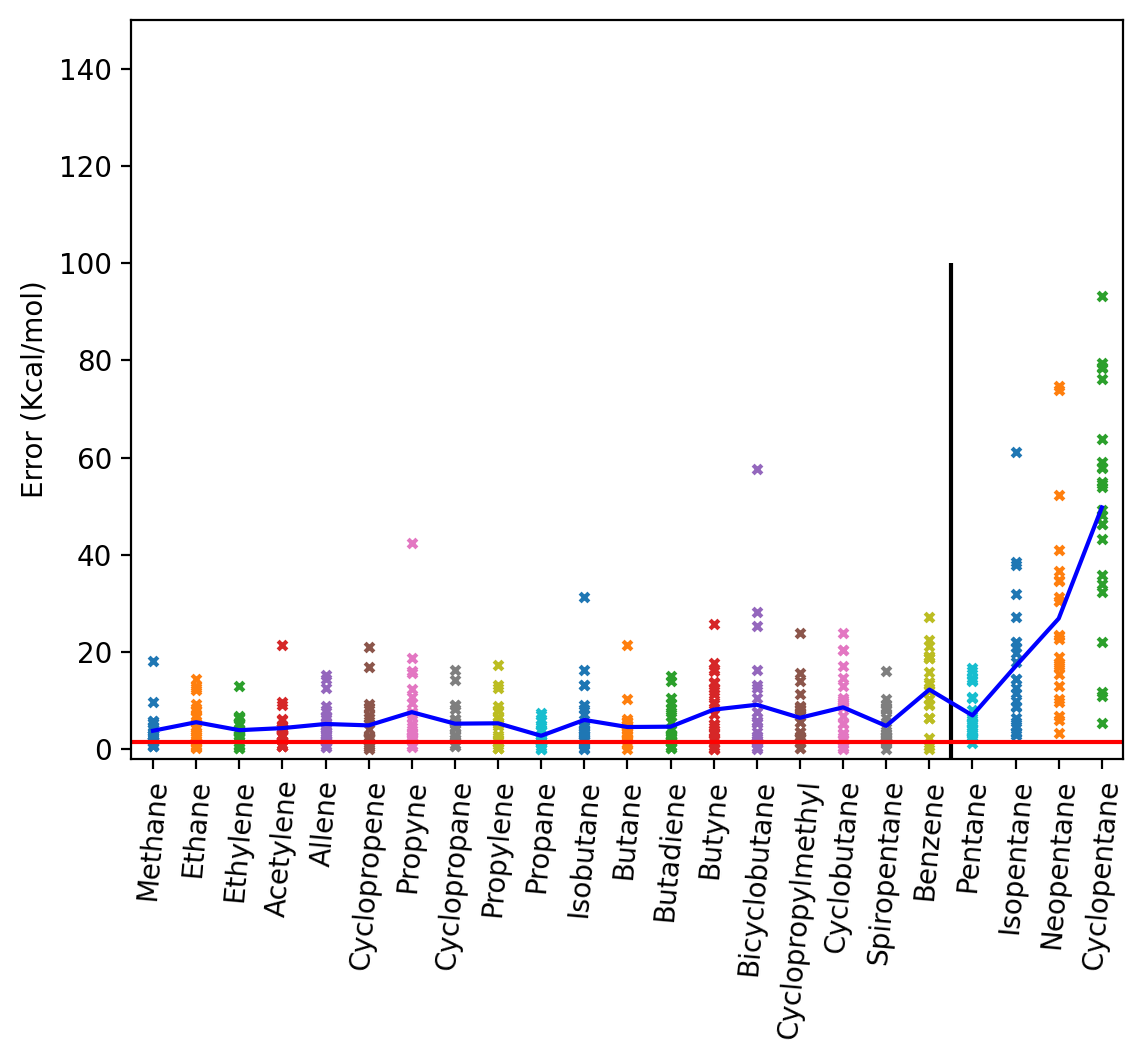

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Cyclopropene",
    "Propyne",
    "Cyclopropane",
    "Propylene",
    "Propane",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Bicyclobutane",
    "Cyclopropylmethyl",
    "Cyclobutane",
    "Spiropentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
    "Neopentane",
    "Cyclopentane",
    # "Hexane",
]

# list_of_path = list(Path("./").glob("validate-2024-05-11-14-21-31-3200"))
list_of_path = list(Path("./").glob("validate-*"))
load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)
data = pd.read_csv(load_path / "train.csv")
error_l = []

for i, i_name in enumerate(TRAIN_STR_DICT):
    data_np = np.abs(data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :]) * 0.627509
    data_np_sort = np.sort(data_np)
    error_l.append(np.mean(np.abs(data_np_sort)))
    plt.scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

i += 1
plt.vlines(i - 0.5, -10, 100, "k")
plt.hlines(1000 / 627.509, -0.5, 100 - 0.5, "r")
# plt.hlines(10000 / 627.509, -0.5, 100 - 0.5, "r", linestyle="--")

data = pd.read_csv(load_path / "eval.csv")
for j, j_name in enumerate(EVAL_STR_DICT):
    data_np = np.abs(data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :]) * 0.627509
    data_np_sort = np.sort(data_np)
    error_l.append(np.mean(np.abs(data_np_sort)))
    plt.scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

plt.xticks(
    range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
    TRAIN_STR_DICT + EVAL_STR_DICT,
    rotation=85,
)

plt.plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, 'b')
plt.ylim(-2, 150)
plt.xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
plt.ylabel("Error (Kcal/mol)")
plt.savefig("./manu/figures/energy4.pdf", bbox_inches="tight")

In [ ]:
import torch
import torch.nn as nn

transformer_model = nn.TransformerEncoderLayer(d_model=250, nhead=1, batch_first=True)

src = torch.rand((10, 250))
src = torch.unsqueeze(src, 1)
out = transformer_model(src)
out = torch.squeeze(out, 1)
print(out.shape)

In [ ]:
import primefac
factors = list(primefac.primefac(196))
factors